In [1]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns

In [47]:
df=pd.read_csv('Admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [48]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [81]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [39]:
df.shape

(400, 9)

In [82]:
uniqueValues = df.nunique()
print(uniqueValues)

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64


In [83]:
unique= df['GRE Score'].nunique()
print(unique)

49


In [84]:
df.sort_values(by='GRE Score')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,118,290,104,4,2.0,2.5,7.46,0,0.45
377,378,290,100,1,1.5,2.0,7.56,0,0.47
168,169,293,97,2,2.0,4.0,7.80,1,0.64
272,273,294,95,1,1.5,1.5,7.64,0,0.49
79,80,294,93,1,1.5,2.0,7.36,0,0.46
...,...,...,...,...,...,...,...,...,...
25,26,340,120,5,4.5,4.5,9.60,1,0.94
202,203,340,120,5,4.5,4.5,9.91,1,0.97
384,385,340,113,4,5.0,5.0,9.74,1,0.96
143,144,340,120,4,4.5,4.0,9.92,1,0.97


In [137]:
df['SOP '].unique()

KeyError: 'SOP '

In [93]:
toefl_u=df['TOEFL Score'].unique()
sort_toefl=pd.Series(toefl_u).sort_values()
sort_toefl

28     92
19     93
27     94
25     95
26     96
21     97
18     98
20     99
24    100
7     101
8     102
4     103
2     104
13    105
10    106
1     107
9     108
6     109
3     110
11    111
12    112
23    113
14    114
5     115
15    116
22    117
0     118
16    119
17    120
dtype: int64

In [132]:
Admit=df['Chance of Admit '].unique()
sort=pd.Series(Admit).sort_values()
sort

1    0
0    1
dtype: int64

In [138]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

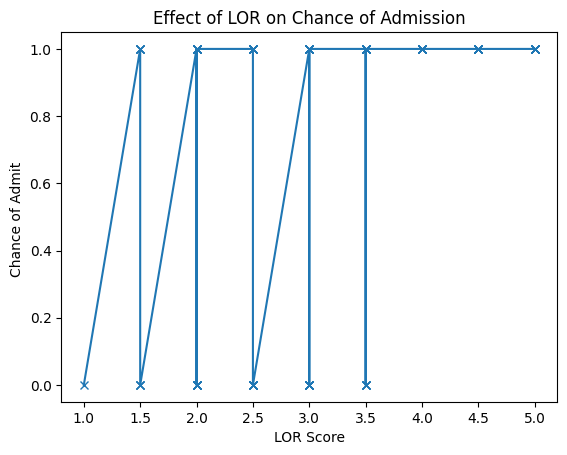

In [134]:
import matplotlib.pyplot as plt
df_sorted = df.sort_values('LOR ')
plt.plot(df_sorted['LOR '], df_sorted['Chance of Admit '], marker='x')
plt.xlabel('LOR Score')
plt.ylabel('Chance of Admit ')
plt.title('Effect of LOR on Chance of Admission')
plt.show()

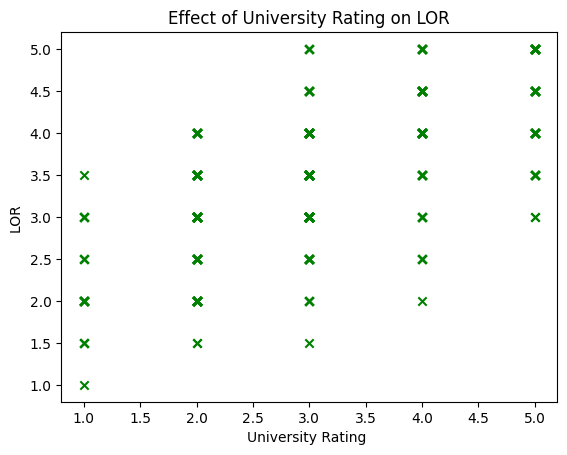

In [140]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['University Rating'],df['LOR '],marker='x',color='green')

# Add labels and title
plt.ylabel('LOR ')
plt.xlabel('University Rating ')
plt.title('Effect of University Rating on LOR')

# Display the plot
plt.show()


In [139]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,1


In [118]:
x=df.drop(columns=['Serial No.','Chance of Admit '],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [117]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x > 0.5 else 0)

In [119]:
y=df['Chance of Admit ']
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [120]:
df['Chance of Admit '].value_counts()

Chance of Admit 
1    365
0     35
Name: count, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y, random_state = 0)

In [122]:
from sklearn.linear_model import LogisticRegression
model1= 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_confusion_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,lr_predict))

confusion matrix
[[ 3  4]
 [ 0 73]]


Accuracy of Logistic Regression: 95.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.95      1.00      0.97        73

    accuracy                           0.95        80
   macro avg       0.97      0.71      0.79        80
weighted avg       0.95      0.95      0.94        80



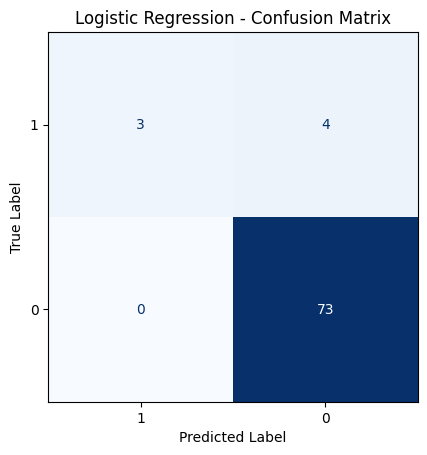

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Blues, colorbar=False)

plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [124]:
from sklearn.naive_bayes import GaussianNB
model2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)
nb_accuracy_score = accuracy_score(y_test, nb_pred)
print("confusion matrix")
print(nb_confusion_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,nb_pred))

confusion matrix
[[ 7  0]
 [ 8 65]]


Accuracy of Naive Bayes model: 90.0 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       1.00      0.89      0.94        73

    accuracy                           0.90        80
   macro avg       0.73      0.95      0.79        80
weighted avg       0.95      0.90      0.92        80



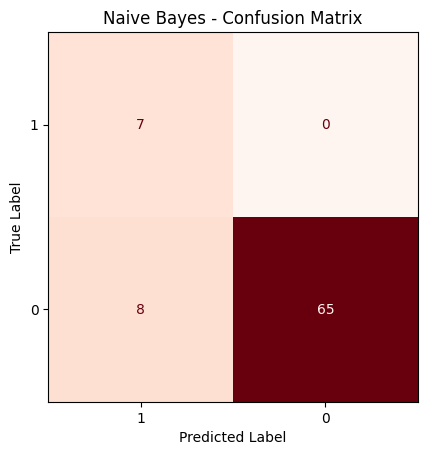

In [125]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Reds, colorbar=False)

plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [126]:
from sklearn.tree import DecisionTreeClassifier
model5= 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion ='entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_confusion_matrix = confusion_matrix(y_test, dt_predicted)
dt_accuracy_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_confusion_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 1  6]
 [ 0 73]]


Accuracy of DecisionTreeClassifier: 92.5 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.92      1.00      0.96        73

    accuracy                           0.93        80
   macro avg       0.96      0.57      0.61        80
weighted avg       0.93      0.93      0.90        80



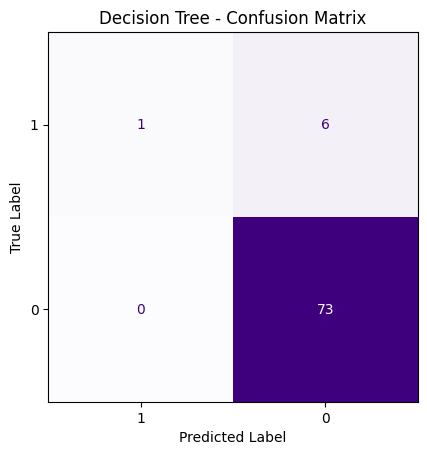

In [127]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Purples, colorbar=False)

plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
from sklearn.neighbors import KNeighborsClassifier
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_predicted)
knn_accuracy_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_confusion_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,knn_predicted))

confussion matrix
[[ 2  5]
 [ 0 73]]


Accuracy of K-NeighborsClassifier: 93.75 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.94      1.00      0.97        73

    accuracy                           0.94        80
   macro avg       0.97      0.64      0.71        80
weighted avg       0.94      0.94      0.92        80



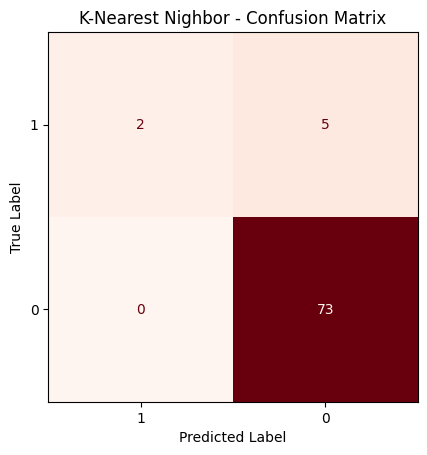

In [129]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Reds, colorbar=False)

plt.title("K-Nearest Nighbor - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [130]:
from sklearn.svm import SVC
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_predicted)
svc_accuracy_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_confusion_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_accuracy_score*100,'\n')
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,svc_predicted,zero_division=1))

confussion matrix
[[ 0  7]
 [ 0 73]]


Accuracy of Support Vector Classifier: 91.25 

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       0.91      1.00      0.95        73

    accuracy                           0.91        80
   macro avg       0.96      0.50      0.48        80
weighted avg       0.92      0.91      0.87        80



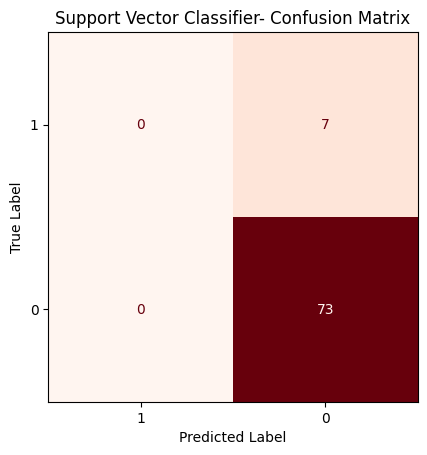

In [131]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=svc_confusion_matrix, display_labels=['1', '0'])
cm_display.plot(cmap=plt.cm.Reds, colorbar=False)

plt.title("Support Vector Classifier- Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [142]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','K-Nearest Neighbour','Decision Tree','Support Vector Machine',], 'Accuracy': [lr_accuracy_score*100,
                    nb_accuracy_score*100,knn_accuracy_score*100,dt_accuracy_score*100,svc_accuracy_score*100]})
print('----------Model Evaluation-----------')
model_evaluation

----------Model Evaluation-----------


,Model,Accuracy
0,Logistic Regression,95.00
1,Naive Bayes,90.00
2,K-Nearest Neighbour,93.75
3,Decision Tree,92.50
4,Support Vector Machine,91.25


                    Model  Accuracy
0     Logistic Regression     95.00
2     K-Nearest Neighbour     93.75
3           Decision Tree     92.50
4  Support Vector Machine     91.25
1             Naive Bayes     90.00


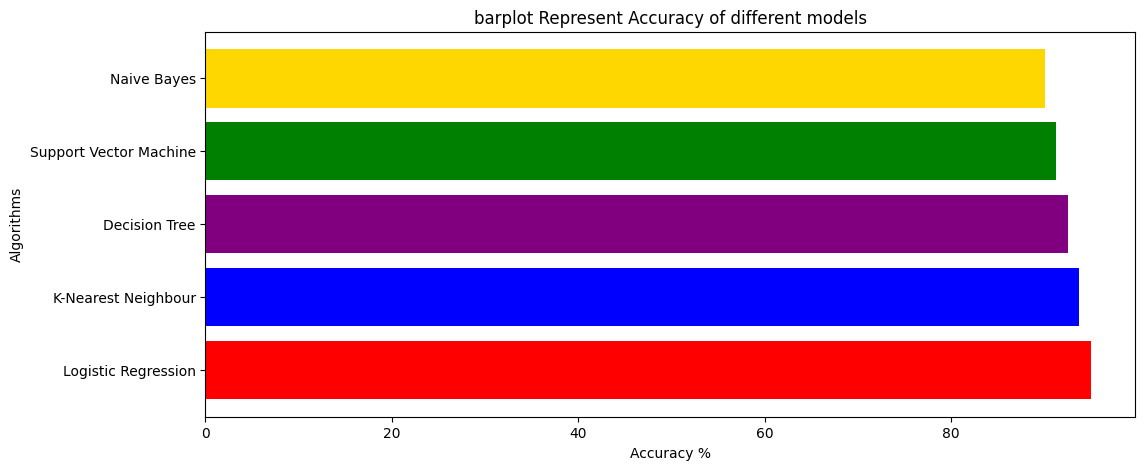

In [150]:
colors = ['red','blue','purple','green','gold']
df_accuracy = model_evaluation.sort_values(by='Accuracy', ascending=False)
print(df_accuracy_score_sorted)
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(df_accuracy['Model'],df_accuracy['Accuracy'],color = colors)
plt.show()

In [151]:
input_data=(337,118,4,4.5,4.5,9.65,1)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("The person has higher chance of getting graduation admission")
else:
     print("The person has little or no chance of getting graduation admission")

[1]
The person has higher chance of getting graduation admission


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
